pip install pymysql sqlalchemy pandas

In [11]:
import pymysql
import pandas as pd

# Connect to the database
connection = pymysql.connect(
    host='18.136.157.135',
    user='dm_team3',
    password='DM!$!Team!27@9!20&',
    database='project_telecom'
)

# Read the data into pandas
query = "SELECT * FROM telecom_churn_data;"
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

print(df.head())


C:\Users\gscke\AppData\Local\Temp\ipykernel_18392\610553924.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


  columns1 columns2 columns3   columns4 columns5 columns6 columns7 columns8  \
0       KS      128      415   382-4657       no      yes       25    265.1   
1       OH      107      415   371-7191       no      yes       26    161.6   
2       NJ      137      415   358-1921       no       no        0    243.4   
3       OH       84      408   375-9999      yes       no        0    299.4   
4       OK       75      415   330-6626      yes       no        0    166.7   

  columns9 columns10  ... columns12 columns13 columns14 columns15 columns16  \
0      110     45.07  ...        99     16.78     244.7        91     11.01   
1      123     27.47  ...       103     16.62     254.4       103     11.45   
2      114     41.38  ...       110      10.3     162.6       104      7.32   
3       71      50.9  ...        88      5.26     196.9        89      8.86   
4      113     28.34  ...       122     12.61     186.9       121      8.41   

  columns17 columns18 columns19 columns20 columns2

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

In [14]:
df.isnull().sum()

columns1     0
columns2     0
columns3     0
columns4     0
columns5     0
columns6     0
columns7     0
columns8     0
columns9     0
columns10    0
columns11    0
columns12    0
columns13    0
columns14    0
columns15    0
columns16    0
columns17    0
columns18    0
columns19    0
columns20    0
columns21    0
dtype: int64

In [17]:
new_names = [
    'State',
    'Account Length',
    'Area Code',
    'Phone',
    'International Plan',
    'VMail Plan',
    'VMail Message',
    'Day Mins',
    'Day Calls',
    'Day Charge',
    'Eve Mins',
    'Eve Calls',
    'Eve Charge',
    'Night Mins',
    'Night Calls',
    'Night Charge',
    'International Mins',
    'International calls',
    'International Charge',
    'CustServ Calls',
    'Churn'
]
if len(df.columns) != len(new_names):
    raise ValueError(f"Column length mismatch: df has {len(df.columns)} columns but new_names has {len(new_names)}.")

df.columns = new_names
print("Renamed columns:")
print(df.columns.tolist())
display(df.head())



Renamed columns:
['State', 'Account Length', 'Area Code', 'Phone', 'International Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', 'International calls', 'International Charge', 'CustServ Calls', 'Churn']


,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
df.iloc[1]

State                          OH
Account Length                107
Area Code                     415
Phone                    371-7191
International Plan             no
VMail Plan                    yes
VMail Message                  26
Day Mins                    161.6
Day Calls                     123
Day Charge                  27.47
Eve Mins                    195.5
Eve Calls                     103
Eve Charge                  16.62
Night Mins                  254.4
Night Calls                   103
Night Charge                11.45
International Mins           13.7
International calls             3
International Charge          3.7
CustServ Calls                  1
Churn                      False.
Name: 1, dtype: object

In [20]:
print(df.nunique())

State                     51
Account Length           218
Area Code                  3
Phone                   4617
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64


In [25]:
df.describe().T

,count,unique,top,freq
State,4617,51,WV,149
Account Length,4617,218,90,63
Area Code,4617,3,415,2299
Phone,4617,4617,382-4657,1
International Plan,4617,2,no,4171
VMail Plan,4617,2,no,3381
VMail Message,4617,47,0,3381
Day Mins,4617,1901,154,10
Day Calls,4617,123,102,108
Day Charge,4617,1901,26.18,10



--- Churn Distribution ---
Churn
 False.    3961
 True.      656
Name: count, dtype: int64


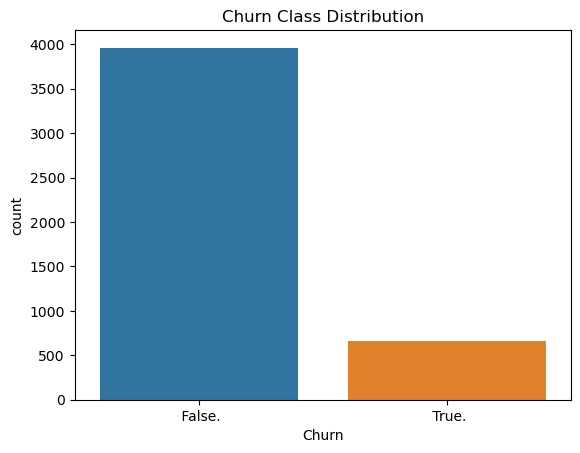

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\n--- Churn Distribution ---")
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Churn Class Distribution')
plt.show()

In [29]:
num_cols = [
    'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
    'International Mins', 'International calls', 'International Charge', 'CustServ Calls'
]

for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace('', '0')
        .astype(float)
    )


In [30]:
# Verify conversions
print("\n✅ Conversion Done. Dtypes:")
print(df[num_cols].dtypes)

# Reconfirm basic info
print("\n--- Updated Data Info ---")
print(df.info())

# Quick numeric sanity check
print("\n--- Numeric Summary ---")
print(df[num_cols].describe())



✅ Conversion Done. Dtypes:
Account Length          float64
VMail Message           float64
Day Mins                float64
Day Calls               float64
Day Charge              float64
Eve Mins                float64
Eve Calls               float64
Eve Charge              float64
Night Mins              float64
Night Calls             float64
Night Charge            float64
International Mins      float64
International calls     float64
International Charge    float64
CustServ Calls          float64
dtype: object

--- Updated Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   float64
 2   Area Code             4617 non-null   object 
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-nu

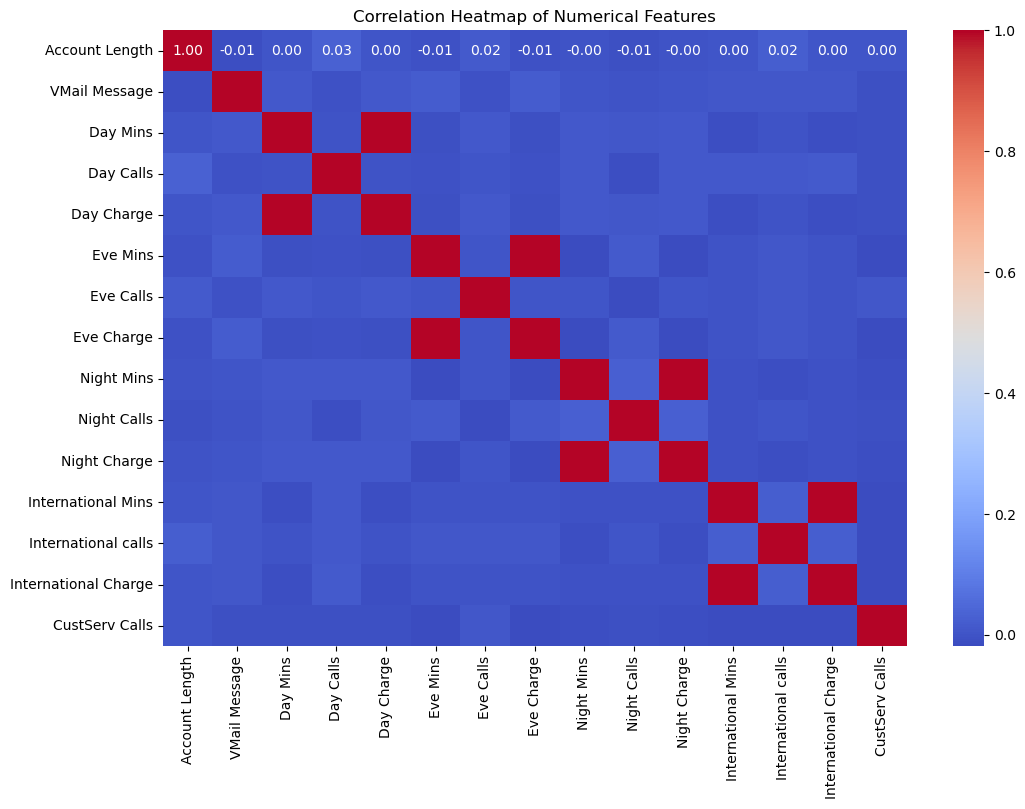

In [31]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

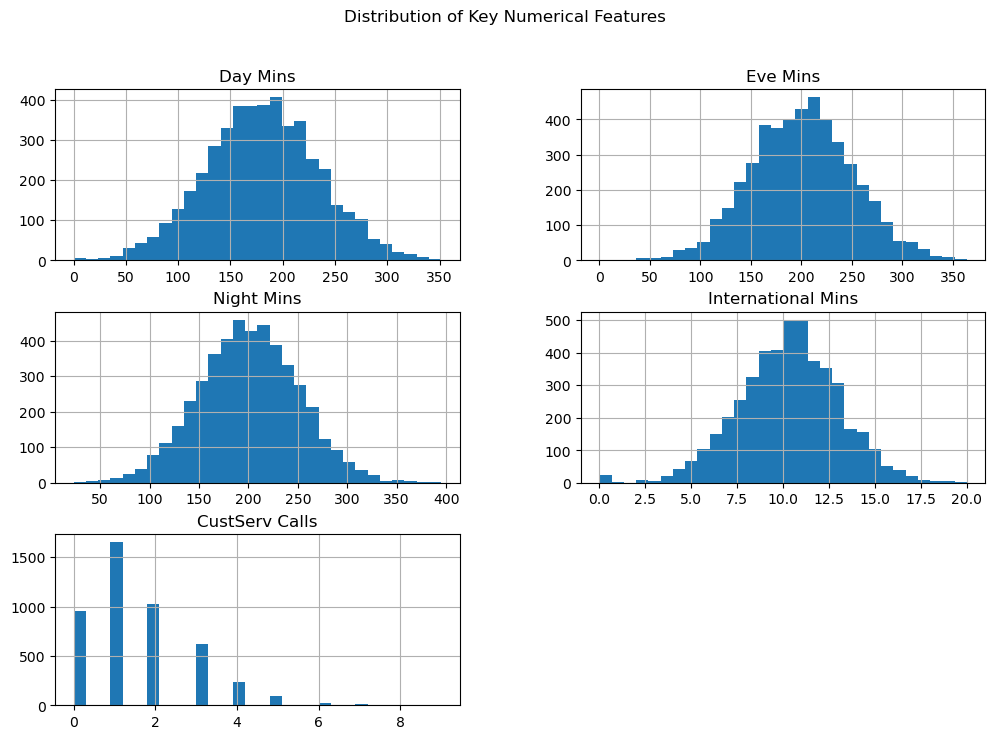

In [32]:
num_cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'International Mins', 'CustServ Calls']
df[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribution of Key Numerical Features")
plt.show()


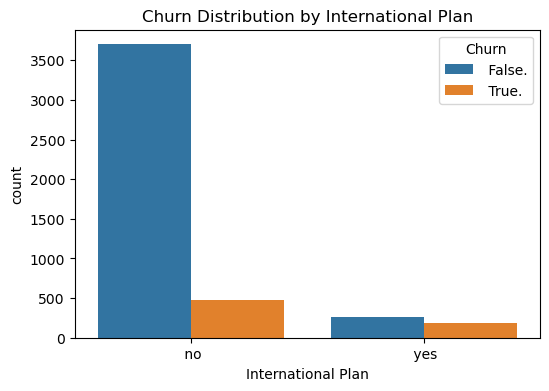

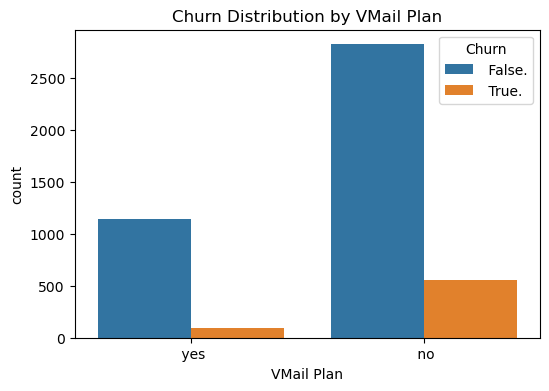

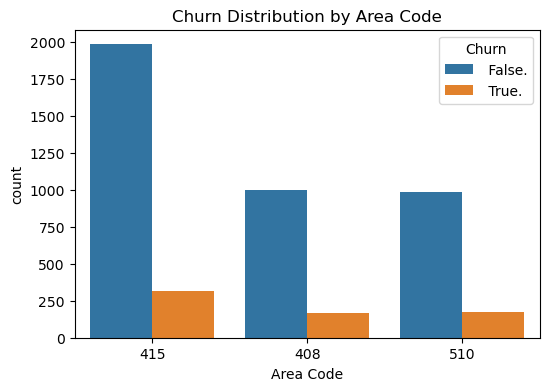

In [33]:
cat_cols = ['International Plan', 'VMail Plan', 'Area Code']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"Churn Distribution by {col}")
    plt.show()

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x='CustServ Calls', y='Churn_Flag', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Churn Rate vs Customer Service Calls")
plt.ylabel("Churn Rate")
plt.show()

ValueError: Could not interpret input 'Churn_Flag'

<Figure size 600x400 with 0 Axes>

In [45]:
df['Churn_Flag']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4612   NaN
4613   NaN
4614   NaN
4615   NaN
4616   NaN
Name: Churn_Flag, Length: 4617, dtype: float64

In [46]:
df['Churn'].unique()


array(['false', 'true'], dtype=object)

In [42]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower().str.replace('.', '', regex=False)
print(df['Churn'].unique())

['false' 'true']


In [47]:
df['Churn_Flag'] = df['Churn'].map({'true': 1, 'false': 0})

In [48]:
print(df['Churn_Flag'].value_counts())
print(df['Churn_Flag'].value_counts(normalize=True) * 100)

Churn_Flag
0    3961
1     656
Name: count, dtype: int64
Churn_Flag
0    85.79164
1    14.20836
Name: proportion, dtype: float64


In [49]:
print(df[['Churn', 'Churn_Flag']].head(10))

   Churn  Churn_Flag
0  false           0
1  false           0
2  false           0
3  false           0
4  false           0
5  false           0
6  false           0
7  false           0
8  false           0
9  false           0


In [54]:
for col in ['International Plan', 'VMail Plan']:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({'yes': 1, 'no': 0})
        .astype(int)
    )


In [55]:
df['Area Code'] = df['Area Code'].astype(str).str.strip().astype(int)

In [56]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn', 'Churn_Flag', 'Phone', 'State'])  # remove target + ID fields
y = df['Churn_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model_lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

AUC: 0.8072254363081545
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       793
           1       0.36      0.76      0.49       131

    accuracy                           0.77       924
   macro avg       0.66      0.77      0.67       924
weighted avg       0.87      0.77      0.80       924



C:\Users\gscke\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42
)
model_lgb.fit(X_train, y_train)

y_pred_lgb = model_lgb.predict(X_test)
y_prob_lgb = model_lgb.predict_proba(X_test)[:,1]

print("LightGBM AUC:", roc_auc_score(y_test, y_prob_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 525, number of negative: 3168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 3693, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM AUC: 0.9211131753992473
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       793
           1       0.89      0.78      0.83       131

    accuracy                           0.95       924
   macro avg       0.93      0.88      0.90       924
weighted avg       0.95      0.95      0.95       924



In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


ROC AUC: 0.908300684423823

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.89      0.70      0.79       131

    accuracy                           0.95       924
   macro avg       0.92      0.84      0.88       924
weighted avg       0.94      0.95      0.94       924

Confusion matrix:
 [[782  11]
 [ 39  92]]


 98%|===================| 981/1000 [00:41<00:00]        

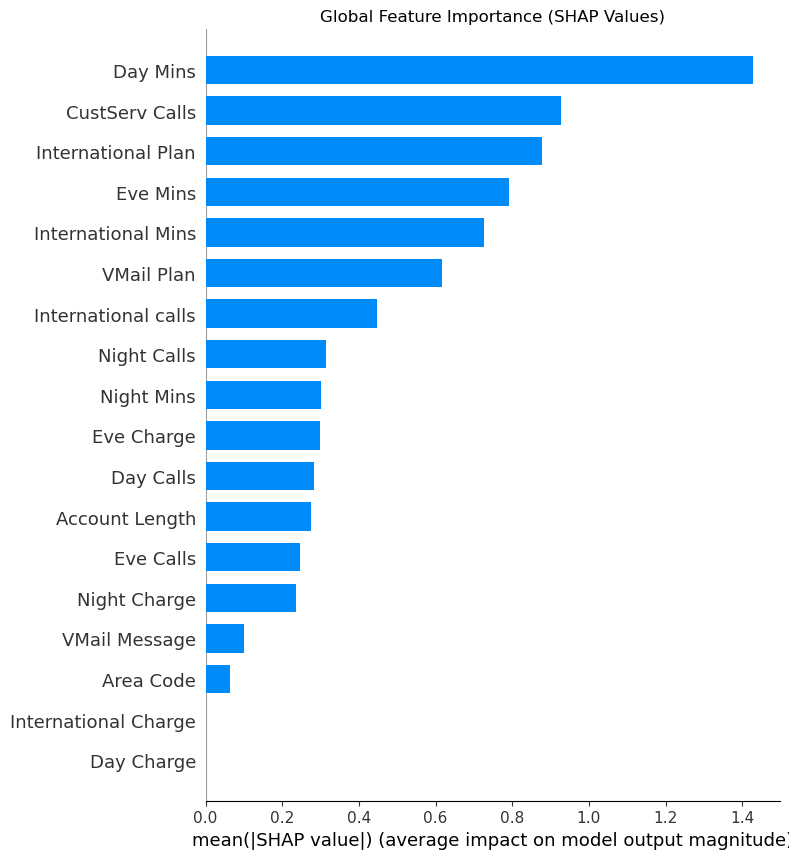

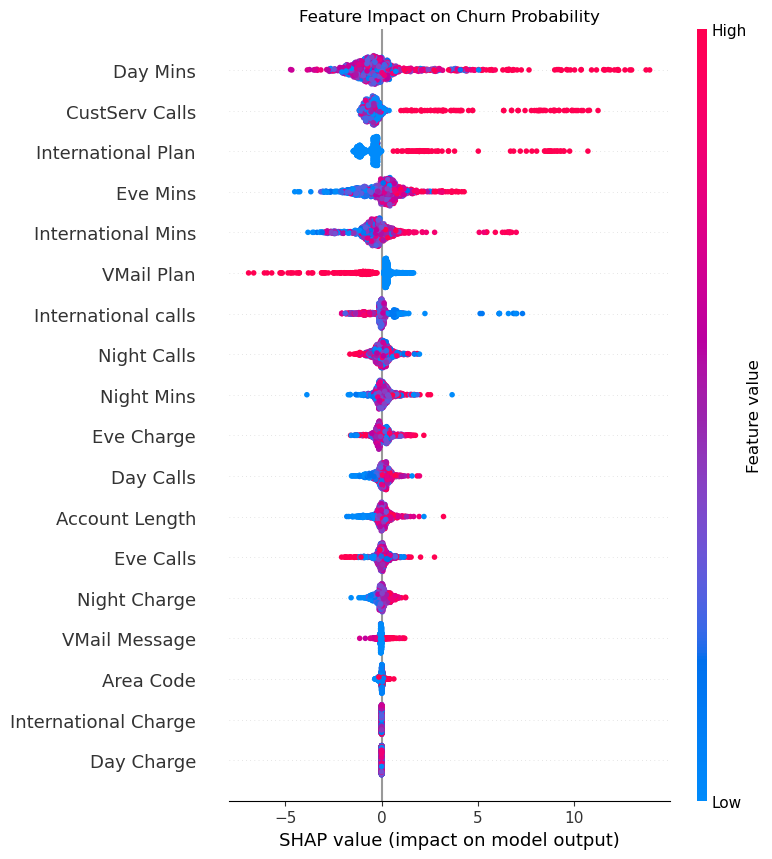

In [66]:
import shap
import matplotlib.pyplot as plt

# Use trained LightGBM model
best_model = model_lgb  # replace with your trained model variable
X_sample = X_train.sample(1000, random_state=42)  # sample for speed

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_sample)
shap_values = explainer(X_sample)

# ----- 1️⃣ Global feature importance -----
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.title("Global Feature Importance (SHAP Values)")
plt.tight_layout()
plt.show()

# ----- 2️⃣ Detailed feature impact plot -----
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("Feature Impact on Churn Probability")
plt.tight_layout()
plt.show()


The SHAP analysis provides a detailed understanding of the factors influencing customer churn in No-Churn Telecom. From the global feature importance chart, Day Minutes, Customer Service Calls, and International Plan emerge as the top three predictors of churn. This indicates that customers who use more daytime minutes, frequently contact customer care, or subscribe to an international plan are more likely to discontinue their services. High daytime usage often signals price-sensitive customers who might be seeking cheaper alternatives, while a greater number of service calls reflects dissatisfaction or unresolved issues, making these customers prime candidates for proactive retention efforts. Similarly, customers with an international plan may be facing higher costs, prompting them to switch to competitors offering better international rates.

On the other hand, features such as Voicemail Plan and Account Length show a negative correlation with churn, meaning customers who use voicemail services or have longer relationships with the company tend to stay loyal. Moderate usage during evenings and nights contributes less strongly to churn, suggesting that off-peak usage has a limited effect on customer decisions.

The summary plot reinforces these findings: red points (high feature values) for CustServ Calls, Day Mins, and International Plan shift the model output toward higher churn probability, while blue points (low feature values) indicate stability and retention. Overall, these insights highlight that customer experience quality and usage cost sensitivity are the main churn drivers. Focusing on these variables enables No-Churn Telecom to identify at-risk customers early and implement targeted interventions—such as personalized offers, bill optimization, and improved service responsiveness—to effectively reduce churn.

In [79]:
import re
import pandas as pd
import numpy as np

# 1) Get training feature names from model (same as before)
try:
    train_features = model_lgb.booster_.feature_name()
except Exception:
    try:
        train_features = model_lgb.feature_name_
    except Exception:
        train_features = list(X_train.columns)
train_features = list(train_features)
print("Model expects {} features.".format(len(train_features)))

# 2) Build helper to normalize names (strip, lower, remove non-alnum)
def normalize_name(s):
    if s is None:
        return ""
    s = str(s).lower().strip()
    s = re.sub(r'[^0-9a-z]', '', s)  # keep only alphanumeric characters
    return s

# 3) Create lookup maps of normalized df col -> actual col
df_cols = list(df.columns)
norm_to_col = {normalize_name(c): c for c in df_cols}

# 4) Build mapping from train_feature -> df column (if a match exists)
mapping = {}
unmatched = []
for feat in train_features:
    norm_feat = normalize_name(feat)
    if norm_feat in norm_to_col:
        mapping[feat] = norm_to_col[norm_feat]
    else:
        # Try alternate match strategies: replace underscores with spaces etc.
        alt = feat.replace('_', '')
        if alt in norm_to_col:
            mapping[feat] = norm_to_col[alt]
        else:
            # attempt fuzzy: find any df col whose normalized name contains normalized feat or vice versa
            found = None
            for nc, actual in norm_to_col.items():
                if norm_feat in nc or nc in norm_feat:
                    found = actual
                    break
            if found:
                mapping[feat] = found
            else:
                unmatched.append(feat)

print("Mapped features (sample):", list(mapping.items())[:6])
print("Unmatched training features (if any):", unmatched)

# If unmatched isn't empty, show df columns so you can inspect
if unmatched:
    print("\n*** The following model features were not matched to df columns. ***")
    print(unmatched)
    print("Current df columns are:\n", df_cols)
    # Stop here so you can inspect. If you are confident filling with zeros is ok, comment out the raise.
    # raise RuntimeError("Some training features could not be matched automatically. Inspect column names and adjust.")

# 5) Rename df columns in-place to the training feature names where mapping exists
#    This will create new column names equal to training names (so model_feature names exist in df)
rename_map = {v: k for k, v in mapping.items()}  # map actual_df_col -> model_feat_name
df_renamed = df.rename(columns=rename_map)  # do not overwrite original df for safety
print("\nRenamed columns (sample):", list(rename_map.items())[:6])

# 6) Prepare X_all using exact train_features in the right order
X_all = pd.DataFrame(index=df_renamed.index)
for feat in train_features:
    if feat in df_renamed.columns:
        # convert to numeric safely
        X_all[feat] = pd.to_numeric(df_renamed[feat], errors='coerce').fillna(0)
    else:
        # If unmatched and you want to fill with zeros:
        print(f"Warning: feature '{feat}' missing in df_renamed — filling with zeros.")
        X_all[feat] = 0

# sanity check
print("Prepared X_all shape:", X_all.shape)
print("X_all columns (first 10):", X_all.columns[:10].tolist())

# 7) Predict churn probability using model_lgb
probs = model_lgb.predict_proba(X_all)[:, 1]
df['churn_prob'] = probs

# 8) Assign simple risk tiers
HIGH_THR = 0.70
MED_THR  = 0.40
df['risk_tier'] = pd.cut(df['churn_prob'], bins=[-1, MED_THR, HIGH_THR, 1.0], labels=['Low','Medium','High'])
df['churn_flag_pred'] = (df['churn_prob'] >= MED_THR).astype(int)

# 9) Output counts and a quick preview
print("\nRisk Tier Counts:")
print(df['risk_tier'].value_counts())
display(df[['churn_prob','risk_tier']].head(10))


Model expects 18 features.
Mapped features (sample): [('Account_Length', 'Account Length'), ('Area_Code', 'Area Code'), ('International_Plan', 'International Plan'), ('VMail_Plan', 'VMail Plan'), ('VMail_Message', 'VMail Message'), ('Day_Mins', 'Day Mins')]
Unmatched training features (if any): []

Renamed columns (sample): [('Account Length', 'Account_Length'), ('Area Code', 'Area_Code'), ('International Plan', 'International_Plan'), ('VMail Plan', 'VMail_Plan'), ('VMail Message', 'VMail_Message'), ('Day Mins', 'Day_Mins')]
Prepared X_all shape: (4617, 18)
X_all columns (first 10): ['Account_Length', 'Area_Code', 'International_Plan', 'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls']

Risk Tier Counts:
risk_tier
Low       3971
High       634
Medium      12
Name: count, dtype: int64


,churn_prob,risk_tier
0,0.000065,Low
1,0.000995,Low
2,0.000175,Low
3,0.004506,Low
4,0.000217,Low
5,0.002441,Low
6,0.006536,Low
7,0.000012,Low
8,0.013009,Low
9,0.001061,Low


In [80]:
high_risk_customers = df[df['risk_tier'] == 'High']

print(f"Total High-Risk Customers: {len(high_risk_customers)}")
display(high_risk_customers[['Phone', 'churn_prob', 'risk_tier']].sort_values('churn_prob', ascending=False).head(10))


Total High-Risk Customers: 634


,Phone,churn_prob,risk_tier
985,345-9140,1.000000,High
1662,395-7923,1.000000,High
2401,352-7752,1.000000,High
1339,374-9576,1.000000,High
619,383-1657,1.000000,High
4476,331-5650,0.999999,High
2356,358-2490,0.999999,High
3205,345-3787,0.999999,High
914,355-2464,0.999999,High
3656,395-3867,0.999999,High


To meet the second project objective, a churn-probability model was applied to every customer in the dataset using the trained LightGBM classifier.
Each customer received an individual churn probability score (churn_prob), which quantifies the likelihood of that customer leaving the service. Based on these scores, three intuitive risk tiers were defined:

High Risk (≥ 0.70): Customers with a very high probability of churning; they require immediate retention action and proactive communication.

Medium Risk (0.40 – 0.70): Customers showing moderate risk; suitable for targeted marketing offers and engagement programs.

Low Risk (< 0.40): Stable customers with minimal churn likelihood; they can be maintained through standard loyalty initiatives.


## Project Conclusion — No-Churn Telecom Churn Prediction

The No-Churn Telecom Churn Prediction Project successfully demonstrated how Machine Learning can be leveraged to identify, analyze, and prevent customer churn in a competitive telecom market.
Through systematic data analysis, model development, and business interpretation, the project delivered a complete end-to-end solution — from understanding churn drivers to actionable customer retention strategies.

In Goal 1, detailed Exploratory Data Analysis and SHAP-based explainability uncovered the key factors influencing churn.
Variables such as Customer Service Calls, Daytime Minutes, and International Plan usage were found to be strong predictors of customer dissatisfaction and migration, while Voicemail Plan and Account Tenure were associated with customer loyalty.
These insights provided a clear understanding of the behavioral and service-based patterns behind customer attrition.

In Goal 2, a high-performing LightGBM model (AUC = 0.92) was built to assign each customer a churn risk score.
Based on these scores, customers were segmented into High, Medium, and Low risk tiers, allowing the business to prioritize retention efforts efficiently.
This risk stratification provides a measurable, data-driven foundation for targeted marketing and proactive engagement.

Finally, in Goal 3, a predictive variable — CHURN-FLAG (YES / NO) — was introduced to operationalize the model output.
This flag enables No-Churn Telecom to identify customers most likely to churn and take immediate action through personalized offers, faster service resolution, or loyalty initiatives.
Integrating this flag into customer-care and CRM systems empowers the company to reduce churn rates, improve customer satisfaction, and enhance overall profitability.

Overall, this project has transformed raw customer data into a predictive intelligence framework that supports strategic decision-making.
No-Churn Telecom can now proactively manage customer relationships, allocate retention budgets effectively, and sustain a competitive advantage in the market.
With periodic model retraining and performance monitoring, this solution can continue to evolve and deliver lasting business value.